<a href="https://colab.research.google.com/github/Swetha-deborah/Bio-Inspired-Ant-Navigation-Simulation-Report-/blob/main/Report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

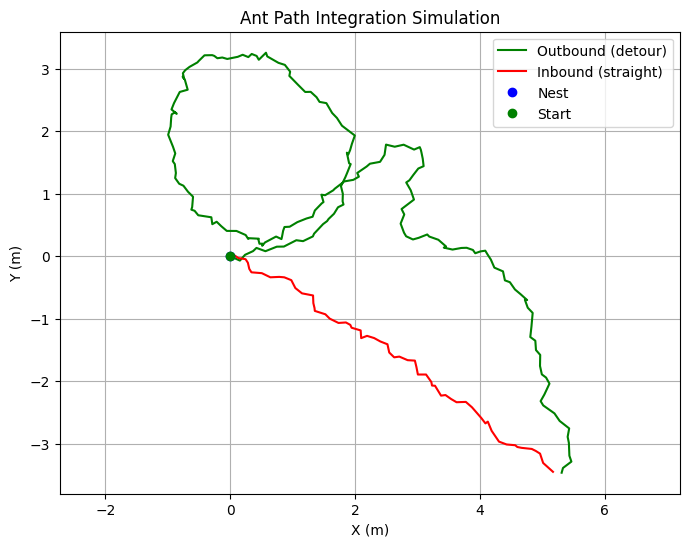

Final position error: 0.07713225284719025
Peak home vector magnitude: 6.378413128659929


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # timestep
v = 1.0   # speed
steps_out = 200  # outbound steps
noise_std = 0.05

# Initialize
pos = np.array([0.0, 0.0])
home_vec = np.array([0.0, 0.0])
path_out = [pos.copy()]
path_in = []
home_vec_history = [home_vec.copy()]  # Track home vector changes

# Outbound: scripted detour (e.g., circle then random)
heading = 0.0
for t in range(steps_out):
    # Detour: circle for 100 steps, then random
    if t < 100:
        heading += np.pi / 50  # turn
    else:
        heading += np.random.normal(0, 0.3)

    dx = v * np.cos(heading) * dt + np.random.normal(0, noise_std)
    dy = v * np.sin(heading) * dt + np.random.normal(0, noise_std)
    delta_d = np.array([dx, dy])

    pos += delta_d
    home_vec -= delta_d
    path_out.append(pos.copy())
    home_vec_history.append(home_vec.copy())

# Inbound: head to home_vec
while np.linalg.norm(pos) > 0.1:
    heading = np.arctan2(home_vec[1], home_vec[0])
    dx = v * np.cos(heading) * dt + np.random.normal(0, noise_std)
    dy = v * np.sin(heading) * dt + np.random.normal(0, noise_std)
    delta_d = np.array([dx, dy])

    pos += delta_d
    home_vec -= delta_d
    path_in.append(pos.copy())

# Plot
plt.figure(figsize=(8,6))
path_out = np.array(path_out)
path_in = np.array(path_in)
plt.plot(path_out[:,0], path_out[:,1], 'g-', label='Outbound (detour)')
plt.plot(path_in[:,0], path_in[:,1], 'r-', label='Inbound (straight)')
plt.plot(0,0, 'bo', label='Nest')
plt.plot(path_out[0,0], path_out[0,1], 'go', label='Start')
plt.axis('equal')
plt.legend()
plt.title('Ant Path Integration Simulation')
plt.xlabel('X (m)'); plt.ylabel('Y (m)')
plt.grid(True)
plt.savefig('ant_simulation.png')
plt.show()

# Final results
final_error = np.linalg.norm(pos)
peak_home_vec = np.max([np.linalg.norm(vec) for vec in home_vec_history])
print("Final position error:", final_error)
print("Peak home vector magnitude:", peak_home_vec)
